In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import math

In [ ]:
df = pd.read_csv("./data/used_cars.csv")

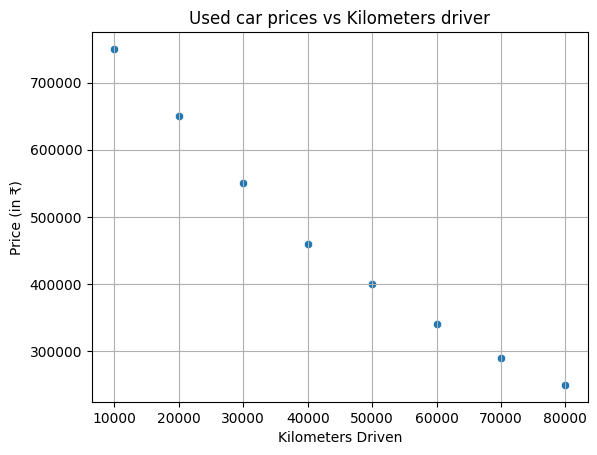

In [4]:
sns.scatterplot(x='km_driven',y='price',data = df)
plt.title('Used car prices vs Kilometers driver')
plt.xlabel("Kilometers Driven")
plt.ylabel("Price (in ₹)")
plt.grid(True)

plt.show()

In [5]:
X = df['km_driven'].values
y = df['price'].values

# Feature Scalling

X = (X - np.mean(X))/np.std(X)
y = (y - np.mean(y))/np.std(y)

In [6]:
# Cost function
def compute_cost(X,y,w,b):
    m = len(X)
    summation = 0
    for i in range(m):
        prediction = w * X[i] + b
        summation += (prediction - y[i]) ** 2
    return summation / (2 * m)

In [7]:
# Gradient Function
def compute_gradient(X,y,w,b):
    m = len(X)
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        prediction = w * X[i] + b
        error = prediction - y[i]
        dj_dw += error * X[i]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [8]:
# Gradient decent loop with cost history tracking
def gradient_descent(X,y,w,b,alpha,num_iters):
    cost_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i%100 == 0 or i == num_iters-1:
            cost = compute_cost(X, y, w, b)
            cost_history.append(cost)
            print(f"Iteration {i}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")
        
    return w,b,cost_history

In [9]:
# Run gradient Descent
w_in = 0.0
b_in = 0.0
alpha = 0.01
iterations = 2000

w_final, b_final, cost_history = gradient_descent(X,y,w_in,b_in,alpha,iterations)

Iteration 0: Cost = 0.4903, w = -0.0099, b = 0.0000
Iteration 100: Cost = 0.0770, w = -0.6293, b = 0.0000
Iteration 200: Cost = 0.0216, w = -0.8560, b = 0.0000
Iteration 300: Cost = 0.0142, w = -0.9390, b = 0.0000
Iteration 400: Cost = 0.0132, w = -0.9693, b = 0.0000
Iteration 500: Cost = 0.0131, w = -0.9805, b = 0.0000
Iteration 600: Cost = 0.0130, w = -0.9845, b = 0.0000
Iteration 700: Cost = 0.0130, w = -0.9860, b = 0.0000
Iteration 800: Cost = 0.0130, w = -0.9866, b = 0.0000
Iteration 900: Cost = 0.0130, w = -0.9868, b = 0.0000
Iteration 1000: Cost = 0.0130, w = -0.9868, b = 0.0000
Iteration 1100: Cost = 0.0130, w = -0.9869, b = 0.0000
Iteration 1200: Cost = 0.0130, w = -0.9869, b = 0.0000
Iteration 1300: Cost = 0.0130, w = -0.9869, b = 0.0000
Iteration 1400: Cost = 0.0130, w = -0.9869, b = 0.0000
Iteration 1500: Cost = 0.0130, w = -0.9869, b = 0.0000
Iteration 1600: Cost = 0.0130, w = -0.9869, b = 0.0000
Iteration 1700: Cost = 0.0130, w = -0.9869, b = 0.0000
Iteration 1800: Cost =

In [10]:
# Predict using the learned paraments
def predict (X,w,b):
    return [w*x+b for x in X]

In [11]:
y_pred = predict(X, w_final, b_final)

In [12]:
print(f"Final model: price = {w_final:.4f} * km_driven + {b_final:.4f}")

Final model: price = -0.9869 * km_driven + 0.0000


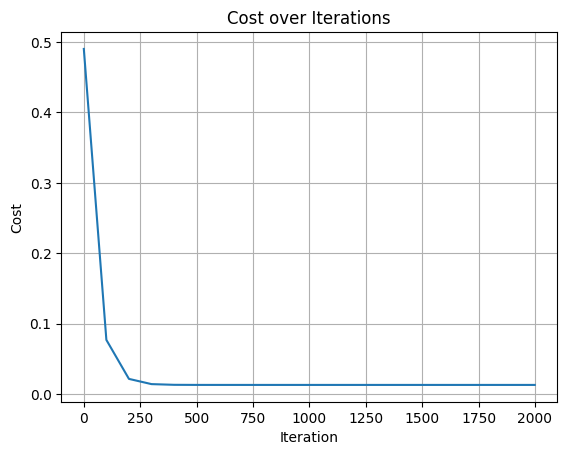

In [13]:
# Plotting cost history
iteration_points = list(range(0,iterations,100))
if iterations - 1 not in iteration_points:
    iteration_points.append(iterations - 1)

plt.plot(iteration_points, cost_history)

plt.title("Cost over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

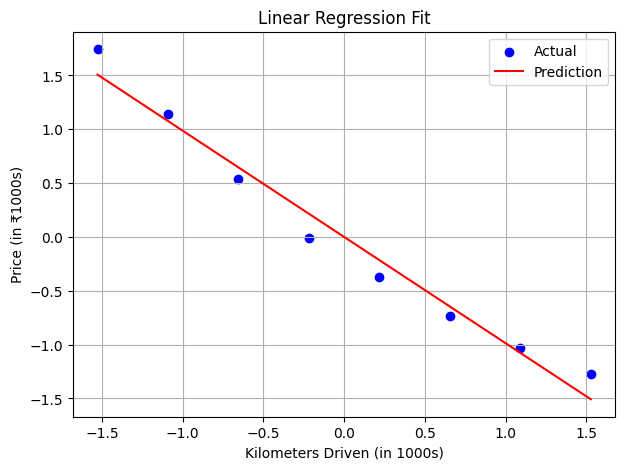

In [14]:
# Plotting regression line
plt.figure(figsize=(7, 5))
plt.scatter(X, y, label="Actual", color='blue')
plt.plot(X, y_pred, label="Prediction", color='red')

plt.title("Linear Regression Fit")
plt.xlabel("Kilometers Driven (in 1000s)")
plt.ylabel("Price (in ₹1000s)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Adding metrics to better understand how accurate this model is

# Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    error = 0.0
    for yt, yp in zip(y_true, y_pred):
        error += abs(yp - yt)
    return error / len(y_true)

# Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    error = 0.0
    for yt, yp in zip(y_true, y_pred):
        error += (yp - yt) ** 2
    return error / len(y_true)

# Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse ** 0.5

# R^2 Score
def r2_score(y_true, y_pred):
    mean_y = sum(y_true) / len(y_true)
    ss_total = sum((yt - mean_y) ** 2 for yt in y_true)
    ss_res = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))
    return 1 - (ss_res / ss_total)


In [16]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\n📊 Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error)     : {mae:.4f}")
print(f"MSE  (Mean Squared Error)      : {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.4f}")
print(f"R²   (R-squared Score)         : {r2:.4f}")



📊 Model Evaluation Metrics:
MAE  (Mean Absolute Error)     : 0.1435
MSE  (Mean Squared Error)      : 0.0261
RMSE (Root Mean Squared Error) : 0.1614
R²   (R-squared Score)         : 0.9739
